## Task 2 : Experimentation and Uplift Testing


 <b>Objective</b> - test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores
 
1.Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

2.Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

3.Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
sns.set()

In [2]:
data = pd.read_csv("QVI_data.csv", parse_dates=["DATE"])
data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [4]:
data.describe(include= 'all')

C:\Users\debad\AppData\Local\Temp\ipykernel_2360\592959234.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include= 'all')


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
count,2.648340e+05,264834,264834.000000,2.648340e+05,264834.000000,264834,264834.000000,264834.000000,264834.000000,264834,264834,264834
unique,NaN,364,NaN,NaN,NaN,114,NaN,NaN,NaN,21,7,3
top,NaN,2018-12-24 00:00:00,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,KETTLE,OLDER SINGLES/COUPLES,Mainstream
freq,NaN,939,NaN,NaN,NaN,3304,NaN,NaN,NaN,41288,54479,101988
first,NaN,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.355488e+05,NaN,135.079423,1.351576e+05,56.583554,NaN,1.905813,7.299346,182.425512,NaN,NaN,NaN
std,8.057990e+04,NaN,76.784063,7.813292e+04,32.826444,NaN,0.343436,2.527241,64.325148,NaN,NaN,NaN
min,1.000000e+03,NaN,1.000000,1.000000e+00,1.000000,NaN,1.000000,1.500000,70.000000,NaN,NaN,NaN
25%,7.002100e+04,NaN,70.000000,6.760050e+04,28.000000,NaN,2.000000,5.400000,150.000000,NaN,NaN,NaN


In [5]:
data['monthID'] = data['DATE'].dt.to_period('M')

In [6]:
pd.set_option('display.max_rows',2000)
metrics = data.groupby(['STORE_NBR','monthID'])\
         [['TOT_SALES','LYLTY_CARD_NBR','TXN_ID']]\
         .agg({'TOT_SALES':sum,'LYLTY_CARD_NBR':'nunique','TXN_ID':'count'})

metrics.rename(columns = {'TOT_SALES':'totSales','LYLTY_CARD_NBR':'nCustomers','TXN_ID':'nTransactions'}, inplace = True)
metrics["nTxnPerCust"] = metrics["nTransactions"]/metrics["nCustomers"]
monthly_perf = pd.DataFrame(metrics)
monthly_perf.reset_index(inplace=True) 

In [7]:
monthly_perf

,STORE_NBR,monthID,totSales,nCustomers,nTransactions,nTxnPerCust
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739
...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,48,1.066667
3165,272,2019-03,442.3,50,53,1.060000
3166,272,2019-04,445.1,54,56,1.037037
3167,272,2019-05,314.6,34,40,1.176471


In [8]:
#Filtering metrics of only pre-trial period, i.e., before Feb 2019 (2019-02)
pre_trial=monthly_perf[monthly_perf['monthID'] <'2019-02']
pre_trial= pd.DataFrame(pre_trial)


## Dropping stores having inadequate data 

In [12]:
for i in pre_trial.STORE_NBR.unique():
    perf_i = pre_trial[pre_trial['STORE_NBR'] == i]["totSales"] 
    print(perf_i)

0    206.9
1    176.1
2    278.8
3    188.1
4    192.6
5    189.6
6    154.8
Name: totSales, dtype: float64
12    150.8
13    193.8
14    154.4
15    167.8
16    162.9
17    136.0
18    162.8
Name: totSales, dtype: float64
24    1205.70
25    1079.75
26    1021.50
27    1037.90
28    1008.00
29    1121.60
30    1051.70
Name: totSales, dtype: float64
36    1399.9
37    1259.5
38    1198.6
39    1346.4
40    1212.0
41    1185.6
42    1525.0
Name: totSales, dtype: float64
48    812.0
49    745.1
50    896.0
51    798.0
52    771.4
53    879.2
54    838.0
Name: totSales, dtype: float64
60    260.0
61    203.2
62    207.7
63    292.4
64    255.3
65    209.1
66    191.1
Name: totSales, dtype: float64
72    1024.7
73    1119.9
74    1147.3
75    1063.9
76    1076.5
77     906.1
78     975.1
Name: totSales, dtype: float64
84    381.6
85    383.0
86    293.0
87    422.8
88    349.2
89    356.4
90    445.0
Name: totSales, dtype: float64
96     289.7
97     327.5
98     369.7
99     361.0
100    

Name: totSales, dtype: float64
2384    320.6
2385    283.6
2386    215.5
2387    274.7
2388    224.2
2389    219.5
2390    256.1
Name: totSales, dtype: float64
2396    3.0
Name: totSales, dtype: float64
2398    934.2
2399    812.1
2400    773.2
2401    920.6
2402    989.4
2403    812.4
2404    841.2
Name: totSales, dtype: float64
2410    680.60
2411    649.65
2412    755.80
2413    809.40
2414    763.60
2415    827.80
2416    737.80
Name: totSales, dtype: float64
2422     723.6
2423     769.5
2424     787.8
2425     785.6
2426     762.8
2427    1005.4
2428     906.2
Name: totSales, dtype: float64
2434    1210.4
2435     994.4
2436    1097.4
2437    1093.0
2438    1215.3
2439    1199.3
2440    1221.8
Name: totSales, dtype: float64
2446    2.6
Name: totSales, dtype: float64
2448    698.2
2449    659.6
2450    768.4
2451    767.4
2452    734.6
2453    785.6
2454    636.2
Name: totSales, dtype: float64
2460    1098.4
2461     873.2
2462    1079.2
2463     902.0
2464    1181.2
2465    1061.

In [13]:
to_remove=[]
for i in pre_trial.STORE_NBR.unique():
    if len(pre_trial[pre_trial["STORE_NBR"] == i]) <7 :
        #print(pre_trial[pre_trial["STORE_NBR"] == i].index)
        to_remove.append(pre_trial[pre_trial["STORE_NBR"] == i].index)
to_remove

[Int64Index([120, 121], dtype='int64'),
 Int64Index([350, 351], dtype='int64'),
 Int64Index([496, 497, 498, 499, 500, 501], dtype='int64'),
 Int64Index([879], dtype='int64'),
 Int64Index([976], dtype='int64'),
 Int64Index([1338, 1339, 1340, 1341, 1342, 1343], dtype='int64'),
 Int64Index([2249], dtype='int64'),
 Int64Index([2396], dtype='int64'),
 Int64Index([2446], dtype='int64'),
 Int64Index([2520, 2521, 2522, 2523, 2524, 2525], dtype='int64'),
 Int64Index([2927], dtype='int64')]

In [14]:
list = [120, 121,350, 351,496, 497, 498, 499, 500, 501,879,976,1338, 1339, 1340, 1341, 1342, 1343,2249,\
        2396,2446,2520,2521, 2522, 2523, 2524, 2525,2927]

pre_trial.drop(list,axis = 0, inplace = True)

In [15]:
for i in pre_trial.STORE_NBR.unique():
    perf_i = pre_trial[pre_trial['STORE_NBR'] == i]["totSales"] 
    if len(perf_i) < 7:
        print("Beep!")

## Selecting control store for store 77

####           Metric : Total Sales

In [16]:
control77 = pd.DataFrame({"Store": pre_trial["STORE_NBR"], "monthID":pre_trial["monthID"], "totSales":pre_trial["totSales"],\
                          "nCustomers":pre_trial["nCustomers"]})
control77

,Store,monthID,totSales,nCustomers
0,1,2018-07,206.90,49
1,1,2018-08,176.10,42
2,1,2018-09,278.80,59
3,1,2018-10,188.10,44
4,1,2018-11,192.60,46
5,1,2018-12,189.60,42
6,1,2019-01,154.80,35
12,2,2018-07,150.80,39
13,2,2018-08,193.80,39
14,2,2018-09,154.40,36


In [17]:
perf_77 =control77[control77['Store'] == 77]["totSales"]


corr_totsales =[]
for i in control77['Store']:
    perf_i = control77[control77['Store'] == i]["totSales"]
    corr = pearsonr(perf_i,perf_77)
    corr_totsales.append(corr[0])

In [18]:
control77["Corr_Sales"] = corr_totsales
control77

,Store,monthID,totSales,nCustomers,Corr_Sales
0,1,2018-07,206.90,49,0.075218
1,1,2018-08,176.10,42,0.075218
2,1,2018-09,278.80,59,0.075218
3,1,2018-10,188.10,44,0.075218
4,1,2018-11,192.60,46,0.075218
5,1,2018-12,189.60,42,0.075218
6,1,2019-01,154.80,35,0.075218
12,2,2018-07,150.80,39,-0.263079
13,2,2018-08,193.80,39,-0.263079
14,2,2018-09,154.40,36,-0.263079


#### Metric : Total Customers

In [19]:
perf_77 =control77[control77['Store'] == 77]["nCustomers"]


corr_nCustomers =[]
for i in control77['Store']:
    perf_i = control77[control77['Store'] == i]["nCustomers"]
    corr = pearsonr(perf_i,perf_77)
    corr_nCustomers.append(corr[0])

In [21]:
control77["Corr_Customers"] =corr_nCustomers
#Calculating the final score by simple average of Corr scores with sales and customers.
control77["Corr_Score"] = 0.5*control77["Corr_Sales"] + 0.5*control77["Corr_Customers"]
control77.set_index('monthID')
control77.sort_values("Corr_Score", ascending= False).head(20).reset_index(drop=True)\
         .style.background_gradient(cmap='Blues')

,Store,monthID,totSales,nCustomers,Corr_Sales,Corr_Customers,Corr_Score
0,77,2018-09,225.200000,42,1.000000,1.000000,1.000000
1,77,2018-07,296.800000,51,1.000000,1.000000,1.000000
2,77,2019-01,204.400000,35,1.000000,1.000000,1.000000
3,77,2018-12,267.300000,46,1.000000,1.000000,1.000000
4,77,2018-11,245.300000,41,1.000000,1.000000,1.000000
5,77,2018-10,204.500000,37,1.000000,1.000000,1.000000
6,77,2018-08,255.500000,47,1.000000,1.000000,1.000000
7,233,2018-07,290.700000,51,0.903774,0.990358,0.947066
8,233,2018-12,279.800000,47,0.903774,0.990358,0.947066
9,233,2018-10,185.700000,35,0.903774,0.990358,0.947066


 So, for trial <b>Store 77</b> the chosen control store is <b>Store 233</b>.

### Visual checks! 

In [22]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 0.50
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)


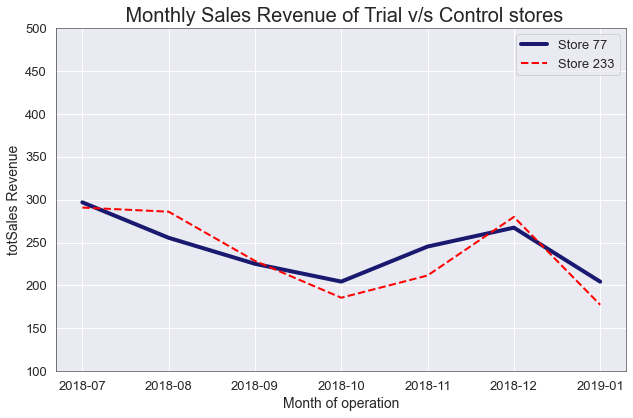

In [23]:
plt.figure(figsize=(9,6), tight_layout=True)
totSales_77 =control77[control77['Store'] == 77]["totSales"]
totSales_233= control77[control77['Store'] == 233]["totSales"]
pre_trial_period =['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01']
plt.plot(pre_trial_period,totSales_77, linewidth= 4, color='midnightblue')
plt.plot(pre_trial_period,totSales_233,linestyle='dashed',color='red',linewidth= 2)
plt.xlabel("Month of operation")
plt.ylabel("totSales Revenue")
plt.legend( labels=['Store 77', 'Store 233'])
plt.title(" Monthly Sales Revenue of Trial v/s Control stores")
plt.ylim(100, 500)
plt.show()         
        

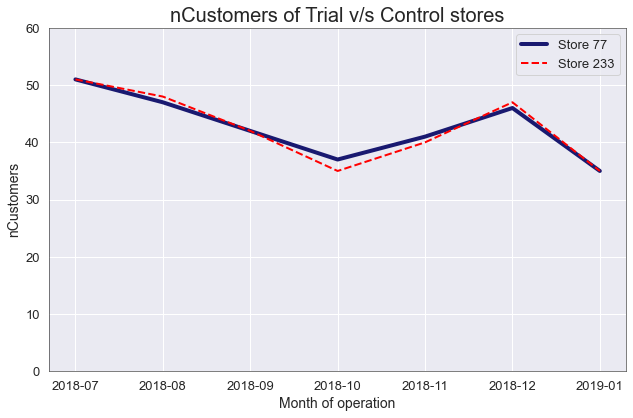

In [24]:
plt.figure(figsize=(9,6), tight_layout=True)
nCustomers_77 =control77[control77['Store'] == 77]["nCustomers"]
nCustomers_233= control77[control77['Store'] == 233]["nCustomers"]
pre_trial_period =['2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01']
plt.plot(pre_trial_period,nCustomers_77, linewidth= 4,color='midnightblue')
plt.plot(pre_trial_period,nCustomers_233,linestyle='dashed',color='red',linewidth= 2)
plt.xlabel("Month of operation")
plt.ylabel("nCustomers")
plt.legend( labels=['Store 77', 'Store 233'])
plt.title("nCustomers of Trial v/s Control stores")
plt.ylim(0, 60)
plt.show()   

### Hypothesis Testing 

The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an
uplift in overall chip sales.<br/>
We’ll start with scaling the control store’s sales to a level similar to control for any differences between the
two stores outside of the trial period.

#### Scaling Factor

In [27]:
totSales_77 = pre_trial[pre_trial["STORE_NBR"]== 77]['totSales'].sum()
totSales_233= pre_trial[pre_trial["STORE_NBR"]== 233]['totSales'].sum()

scaling_factor= totSales_77/totSales_233
print("Trial store has " + str(round(scaling_factor,2)) + "x times total sales revenue than Control store.")

Trial store has 1.02x times total sales revenue than Control store.


In [51]:
#Applying scale factor to sales of Control Store- For POST-TRIAL Period
Scaled_totSales_233 = monthly_perf[(monthly_perf["STORE_NBR"]==233) & (monthly_perf["monthID"] > '2019-02')]['totSales'] \
                                                                        * scaling_factor

sales_77_post = monthly_perf[(monthly_perf["STORE_NBR"]== 77) & (monthly_perf["monthID"] > '2019-02')]['totSales']


control = np.mean(Scaled_totSales_233)
trial = np.mean(sales_77_post)

In [59]:
lift = (trial-control)/control
print("Difference in sales is: " + str(round(lift*100,2)) + '%')

Difference in sales is: 17.05%


In [69]:
pct_diff= (np.array(sales_77_post) - np.array(Scaled_totSales_233))/np.array(Scaled_totSales_233)
print(pct_diff)

[ 0.36652103  0.6230796  -0.15100339  0.17010288]


### Is this difference statistically significant?

We use t-test to test the null hypothesis that there is no  real difference in total sales across trial vs control stores. 

In [71]:
from scipy.stats import ttest_1samp

In [72]:
t_stat, p_value = ttest_1samp(pct_diff,lift)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  0.5002509657566417
P-Value:  0.6512907816193132


So, the difference in sales is not significant statitstically.
